# Drug Synergy Predictio

## Group 1
Guilherme Sousa

Joana Araújo

Karyna Lysenko

Tiago Silva

**Definition**: Synergy is a dimensionless measure of deviation of an observed drug combination response from the expected effect of non-interaction. Synergy can be calculated using different models such as the Bliss model, Highest Single Agent (HSA), Loewe additivity model and Zero Interaction Potency (ZIP). Another relevant metric is CSS which measures the drug combination sensitivity and is derived using relative IC50 values of compounds and the area under their dose-response curves.

**Impact**: Drug combination therapy offers enormous potential for expanding the use of existing drugs and in improving their efficacy. For instance, the simultaneous modulation of multiple targets can address the common mechanisms of drug resistance in the treatment of cancers. However, experimentally exploring the entire space of possible drug combinations is not a feasible task. Computational models that can predict the therapeutic potential of drug combinations can thus be immensely valuable in guiding this exploration.

**Generalization**: It is important for model predictions to be able to adapt to varying underlying biology as captured through different cell lines drawn from multiple tissues of origin. Dosage is also an important factor that can impact model generalizability.

**Product**: Small-molecule.

**Pipeline**: Activity.

Link:https://tdcommons.ai/multi_pred_tasks/drugsyn/

**Dataset Description**: A large-scale oncology screen produced by Merck & Co., where each sample consists of two compounds and a cell line. The dataset covers 583 distinct combinations, each tested against 39 human cancer cell lines derived from 7 different tissue types. Pairwise combinations were constructed from 38 diverse anticancer drugs (14 experimental and 24 approved). The synergy score is calculated by Loewe Additivity values using the batch processing mode of Combenefit. The genomic features are from ArrayExpress database (accession number: E-MTAB-3610) and was quantile normalized and summarized with Factor Analysis for Robust Microarray Summarization (FARMS). The processed data is provided by DeepSynergy.

**Task Description**: Regression. Given the gene expression of cell lines and two SMILES strings of the drug combos, predict the drug synergy level.

**Dataset Statistics**: 23,052 drug combo-cell line points, among 39 cancer cell lines and 37 drugs

# Imports 

In [2]:
from tdc.multi_pred import DrugSyn
import pandas as pd

In [3]:
data = DrugSyn(name = "OncoPolyPharmacology")
dataset=data.get_data()
dataset

Found local copy...
Loading...
Done!


,Drug1_ID,Drug2_ID,Cell_Line_ID,Y,Cell_Line,Drug1,Drug2
0,5-FU,ABT-888,A2058,7.693530,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
1,5-FU,ABT-888,A2780,7.778053,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
2,5-FU,ABT-888,A375,-1.198505,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
3,5-FU,ABT-888,A427,2.595684,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
4,5-FU,ABT-888,CAOV3,-5.139971,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
...,...,...,...,...,...,...,...
23047,ZOLINZA,TOPOTECAN,UACC62,10.223066,"[-0.18899497244411118, -0.19839747536407973, -...",O=C(CCCCCCC(=O)Nc1ccccc1)NO,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O...
23048,ZOLINZA,TOPOTECAN,UWB1289BRCA1,20.551627,"[-0.18899497244411118, -0.19839747536407973, -...",O=C(CCCCCCC(=O)Nc1ccccc1)NO,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O...
23049,ZOLINZA,TOPOTECAN,UWB1289,12.190316,"[-0.18899497244411118, -0.19839747536407973, -...",O=C(CCCCCCC(=O)Nc1ccccc1)NO,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O...
23050,ZOLINZA,TOPOTECAN,VCAP,23.438547,"[-0.18899497244411118, -0.19839747536407973, -...",O=C(CCCCCCC(=O)Nc1ccccc1)NO,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O...


In [4]:
dataset.iloc[[38,39,40]]

,Drug1_ID,Drug2_ID,Cell_Line_ID,Y,Cell_Line,Drug1,Drug2
38,5-FU,ABT-888,ZR751,-8.675317,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
39,5-FU,AZD1775,A2058,13.052687,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-...
40,5-FU,AZD1775,A2780,11.277273,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-...


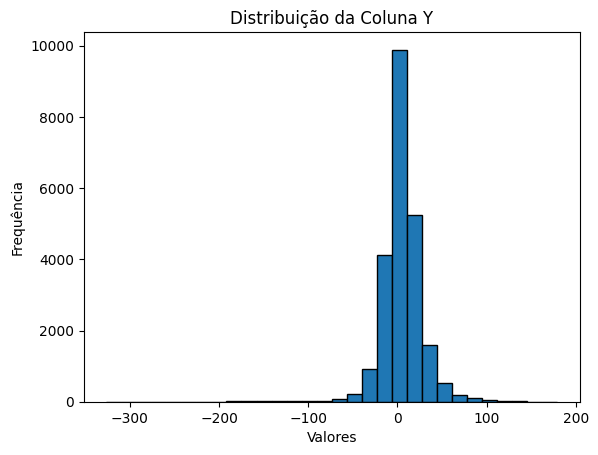

In [5]:
import matplotlib.pyplot as plt

# Substitua 'nome_da_coluna_Y' pelo nome real da sua coluna Y
coluna_Y = 'Y'

# Crie um gráfico de distribuição
plt.hist(dataset[coluna_Y], bins=30, edgecolor='black')
plt.title('Distribuição da Coluna Y')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [6]:
b=dataset["Cell_Line"][0]
len(b)

8785

In [12]:
a=dataset["Cell_Line"].apply(pd.Series)
a.columns=[f"cell_line_{i}" for i in range(a.shape[1])]
dataset=pd.concat([dataset,a], axis=1)
dataset=dataset.drop("Cell_Line", axis=1)
dataset

KeyboardInterrupt: 

In [ ]:
a.columns=